# Import lib

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import folium
from IPython.display import display, clear_output
import geopandas as gpd

# Import du Dataset / test de taille

In [5]:
df = pd.read_csv('p2-arbres-fr.csv', sep=';')
df.shape

(200137, 18)

In [6]:
df.info

<bound method DataFrame.info of              id type_emplacement domanialite     arrondissement  \
0         99874            Arbre      Jardin     PARIS 7E ARRDT   
1         99875            Arbre      Jardin     PARIS 7E ARRDT   
2         99876            Arbre      Jardin     PARIS 7E ARRDT   
3         99877            Arbre      Jardin     PARIS 7E ARRDT   
4         99878            Arbre      Jardin    PARIS 17E ARRDT   
...         ...              ...         ...                ...   
200132  2024741            Arbre      Jardin  BOIS DE VINCENNES   
200133  2024742            Arbre      Jardin  BOIS DE VINCENNES   
200134  2024743            Arbre      Jardin  BOIS DE VINCENNES   
200135  2024744            Arbre      Jardin  BOIS DE VINCENNES   
200136  2024745            Arbre      Jardin  BOIS DE VINCENNES   

       complement_addresse  numero  \
0                      NaN     NaN   
1                      NaN     NaN   
2                      NaN     NaN   
3          

In [7]:
df.head(100)

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,99975,Arbre,Jardin,PARIS 4E ARRDT,NaN,NaN,SQUARE ALBERT SCHWEITZER,9,Tilleul,Tilia,x europaea,Euchlora',80,7,NaN,NaN,48.853975,2.357815
96,99976,Arbre,Jardin,PARIS 4E ARRDT,NaN,NaN,SQUARE ALBERT SCHWEITZER,10,Tilleul,Tilia,x europaea,Euchlora',90,7,NaN,NaN,48.853928,2.357778
97,99977,Arbre,Jardin,PARIS 4E ARRDT,NaN,NaN,SQUARE ALBERT SCHWEITZER,11,Tilleul,Tilia,x europaea,Euchlora',80,7,NaN,NaN,48.853874,2.357733
98,99978,Arbre,Jardin,PARIS 4E ARRDT,NaN,NaN,SQUARE ALBERT SCHWEITZER,12,Tilleul,Tilia,x europaea,Euchlora',95,7,NaN,NaN,48.853821,2.357690


# Verification type

In [9]:
df.dtypes

id                       int64
type_emplacement        object
domanialite             object
arrondissement          object
complement_addresse     object
numero                 float64
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
variete                 object
circonference_cm         int64
hauteur_m                int64
stade_developpement     object
remarquable            float64
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object

# Verification doublon

In [11]:
for column in df.columns:
    doublons = df[column].duplicated().sum()
    print(f"Column: {column}")
    print(doublons)

Column: id
0
Column: type_emplacement
200136
Column: domanialite
200127
Column: arrondissement
200112
Column: complement_addresse
196341
Column: numero
200136
Column: lieu
193216
Column: id_emplacement
131097
Column: libelle_francais
199944
Column: genre
199961
Column: espece
199597
Column: variete
199700
Column: circonference_cm
199606
Column: hauteur_m
199994
Column: stade_developpement
200132
Column: remarquable
200134
Column: geo_point_2d_a
30
Column: geo_point_2d_b
23


# Nombre de valeurs manquantes

In [13]:
df.isna().any()

id                     False
type_emplacement       False
domanialite             True
arrondissement         False
complement_addresse     True
numero                  True
lieu                   False
id_emplacement         False
libelle_francais        True
genre                   True
espece                  True
variete                 True
circonference_cm       False
hauteur_m              False
stade_developpement     True
remarquable             True
geo_point_2d_a         False
geo_point_2d_b         False
dtype: bool

## Pourcentage éléments manquants

In [15]:
df.isna().mean()

id                     0.000000
type_emplacement       0.000000
domanialite            0.000005
arrondissement         0.000000
complement_addresse    0.845596
numero                 1.000000
lieu                   0.000000
id_emplacement         0.000000
libelle_francais       0.007480
genre                  0.000080
espece                 0.008754
variete                0.816241
circonference_cm       0.000000
hauteur_m              0.000000
stade_developpement    0.335795
remarquable            0.315274
geo_point_2d_a         0.000000
geo_point_2d_b         0.000000
dtype: float64

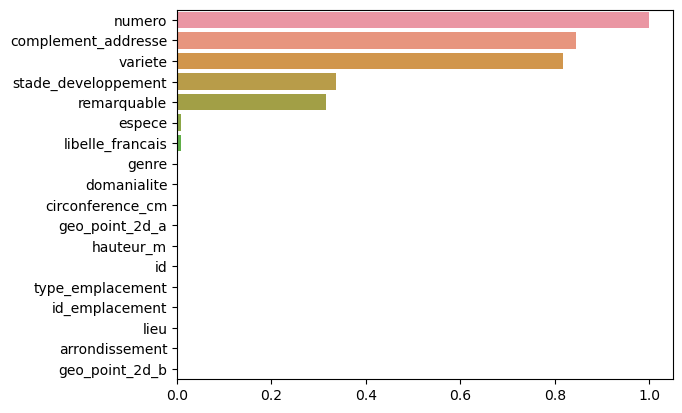

In [16]:
valeurs_manq = df.isna().mean().sort_values(ascending=False)
sns.barplot(x=valeurs_manq.values, y=valeurs_manq.index);

# Nettoyage

## nettoyage remarquable

In [19]:
modif_lignes = df['remarquable'].isna().sum()
df.loc[df['remarquable'].isna(), 'remarquable'] = 0
print(f"\nNombre de lignes affectées: {modif_lignes}")


Nombre de lignes affectées: 63098


## Nettoyage hauteur et circonférence

#### Suppression valeurs aberrantes hauteur

In [22]:
lignes_supp = df[df['hauteur_m'] > 35].index
nomb_lignes_supp = len(lignes_supp)
print(f"\nNombre de lignes supprimées : {nomb_lignes_supp}")
df = df.drop(lignes_supp)
v_max = df['hauteur_m'].max()
print("La valeur maximum de hauteur_m dans df_hauteur est:", v_max)


Nombre de lignes supprimées : 509
La valeur maximum de hauteur_m dans df_hauteur est: 35


#### Suppression valeurs aberrantes circonférences

In [24]:
supp_lign = df[df['circonference_cm'] > 3500].index
nomb_supp_ligne = len(supp_lign)
print(f"\nNombre de lignes à supprimer : {nomb_supp_ligne}")
df = df.drop(supp_lign)
c_max = df['circonference_cm'].max()
print("La valeur maximum de circonference_cm dans est:", c_max)


Nombre de lignes à supprimer : 18
La valeur maximum de circonference_cm dans est: 3120


### Calcul mediane hauteur et circonférence en fonction du genre

#### Mode sur genre pour combler les valeurs manquantes

In [27]:
df_hauteur = df.groupby('genre')['hauteur_m'].median().reset_index()
print(df_hauteur)
mode_genre = df['genre'].mode()
df['genre'].fillna(mode_genre, inplace=True)
missing_values_genre_after = df['genre'].isnull().sum()
print("Valeur manquante après remplacement", missing_values_genre_after)

                 genre  hauteur_m
0               Abelia        5.5
1                Abies        4.0
2               Acacia        3.0
3                 Acca        1.0
4                 Acer        6.0
..                 ...        ...
170            Zelkova        5.0
171           Ziziphus        0.0
172         x Chitalpa        3.0
173  x Cupressocyparis        7.0
174       x Sorbopyrus        0.0

[175 rows x 2 columns]
Valeur manquante après remplacement 16


#### Calcul mediane Hauteur

In [29]:
df_hauteur = df.groupby('genre')['hauteur_m'].median().reset_index()
print(df_hauteur)

                 genre  hauteur_m
0               Abelia        5.5
1                Abies        4.0
2               Acacia        3.0
3                 Acca        1.0
4                 Acer        6.0
..                 ...        ...
170            Zelkova        5.0
171           Ziziphus        0.0
172         x Chitalpa        3.0
173  x Cupressocyparis        7.0
174       x Sorbopyrus        0.0

[175 rows x 2 columns]


#### Calcul Mediane Circonférence

In [31]:
df_circo = df.groupby('genre')['circonference_cm'].median().reset_index()
print(df_circo)

                 genre  circonference_cm
0               Abelia              47.5
1                Abies              40.0
2               Acacia              25.0
3                 Acca              10.0
4                 Acer              65.0
..                 ...               ...
170            Zelkova              50.0
171           Ziziphus              23.0
172         x Chitalpa              20.0
173  x Cupressocyparis              45.0
174       x Sorbopyrus               0.0

[175 rows x 2 columns]


#### Remplacement valeurs manquantes

Remplacement des NaN et des valeurs 0 dans 'circonference_cm' avec les valeurs medianes en fonction du genre des arbres

In [34]:
modif_nan = df['circonference_cm'].isna().sum()
df['circonference_cm'] = df.groupby('genre')['circonference_cm'].transform(lambda x: x.fillna(x.median()))
print(f"\nNombre de lignes affectées: {modif_nan}")
modif_z = (df['circonference_cm'] == 0).sum()
df['circonference_cm'] = df.groupby('genre')['circonference_cm'].transform(lambda x: x.replace(0, x[x != 0].median()))
print(f"\nNombre de lignes affectées: {modif_z}")
print (df['circonference_cm'])


Nombre de lignes affectées: 0

Nombre de lignes affectées: 25844
0          20.0
1          65.0
2          90.0
3          60.0
4          38.0
          ...  
200132     30.0
200133     35.0
200134    125.0
200135     59.0
200136     55.0
Name: circonference_cm, Length: 199610, dtype: float64


Remplacement des NaN dans 'hauteur_m'avec les valeurs medianes en fonction du genre des arbres (pas les valeurs à 0, un arbre peut faire 0,8 m)

In [36]:
modif_nan = df['hauteur_m'].isna().sum()
df['hauteur_m'] = df.groupby('genre')['hauteur_m'].transform(lambda x: x.fillna(x.median()))
print(f"\nNombre de lignes affectées: {modif_nan}")
print (df['hauteur_m'])


Nombre de lignes affectées: 0
0          5.0
1          8.0
2         10.0
3          8.0
4          0.0
          ... 
200132     0.0
200133     0.0
200134     0.0
200135     0.0
200136     0.0
Name: hauteur_m, Length: 199610, dtype: float64


## affichage des valeurs nettoyées

In [38]:
df = df.drop(['id','type_emplacement','complement_addresse', 'numero', 'variete','id_emplacement'], axis=1)
df.head(5)

,domanialite,arrondissement,lieu,libelle_francais,genre,espece,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Marronnier,Aesculus,hippocastanum,20.0,5.0,NaN,0.0,48.857620,2.320962
1,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,65.0,8.0,A,0.0,48.857656,2.321031
2,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,90.0,10.0,A,0.0,48.857705,2.321061
3,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Erable,Acer,negundo,60.0,8.0,A,0.0,48.857722,2.321006
4,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,Arbre à miel,Tetradium,daniellii,38.0,0.0,NaN,0.0,48.890435,2.315289


# Stats basiques

## caractéristiques principales de chaque variable numérique

In [41]:
df.describe()

,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,199559.000000,199594.000000,199610.000000,199610.000000,199610.000000
mean,89.753795,8.322334,0.000902,48.854528,2.348209
std,60.794087,6.174513,0.030016,0.030236,0.051253
min,1.000000,0.000000,0.000000,48.742290,2.210241
25%,50.000000,5.000000,0.000000,48.835062,2.307480
50%,80.000000,8.000000,0.000000,48.854213,2.351170
75%,115.000000,12.000000,0.000000,48.876491,2.386880
max,3120.000000,35.000000,1.000000,48.911485,2.469759


## Valeurs unique par colonne après nettoyage

In [43]:
for column in df.columns:
    valeur_unique = df[column].value_counts().reset_index()
    valeur_unique.columns = [column, 'Counts']
    print(f"Valeur uniques par colonne: {column}")
    print(valeur_unique)
    print("\n")

Valeur uniques par colonne: domanialite
    domanialite  Counts
0    Alignement  104716
1        Jardin   46215
2     CIMETIERE   31913
3         DASCO    6407
4  PERIPHERIQUE    5325
5           DJS    3686
6          DFPE    1322
7           DAC      21
8         DASES       4


Valeur uniques par colonne: arrondissement
       arrondissement  Counts
0     PARIS 15E ARRDT   17127
1     PARIS 13E ARRDT   16481
2     PARIS 16E ARRDT   16382
3     PARIS 20E ARRDT   15329
4     PARIS 19E ARRDT   13683
5     PARIS 12E ARRDT   12559
6   SEINE-SAINT-DENIS   11565
7   BOIS DE VINCENNES   11493
8     PARIS 14E ARRDT   11388
9     PARIS 17E ARRDT   10755
10    PARIS 18E ARRDT    9985
11     PARIS 7E ARRDT    8566
12       VAL-DE-MARNE    7575
13     PARIS 8E ARRDT    7243
14    PARIS 11E ARRDT    5647
15     HAUTS-DE-SEINE    5298
16   BOIS DE BOULOGNE    3975
17    PARIS 10E ARRDT    3383
18     PARIS 4E ARRDT    2736
19     PARIS 5E ARRDT    2350
20     PARIS 6E ARRDT    1759
21    PARIS 1ER

# Graphiques

## Repartition Stade développement

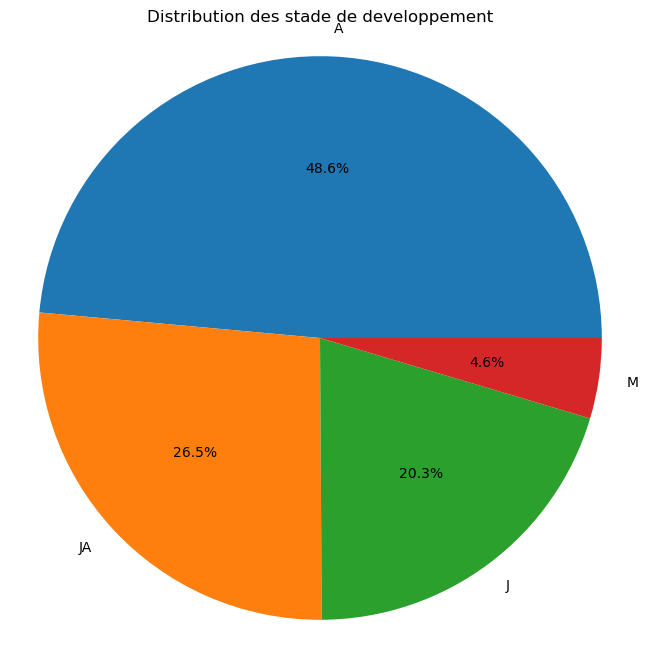

In [46]:
std_dev = df['stade_developpement'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(std_dev, labels=std_dev.index, autopct='%1.1f%%',)
plt.axis('equal')
plt.title('Distribution des stade de developpement')
plt.show()

## Répartition des arbres selon arrondissements

<Axes: xlabel='count', ylabel='arrondissement'>

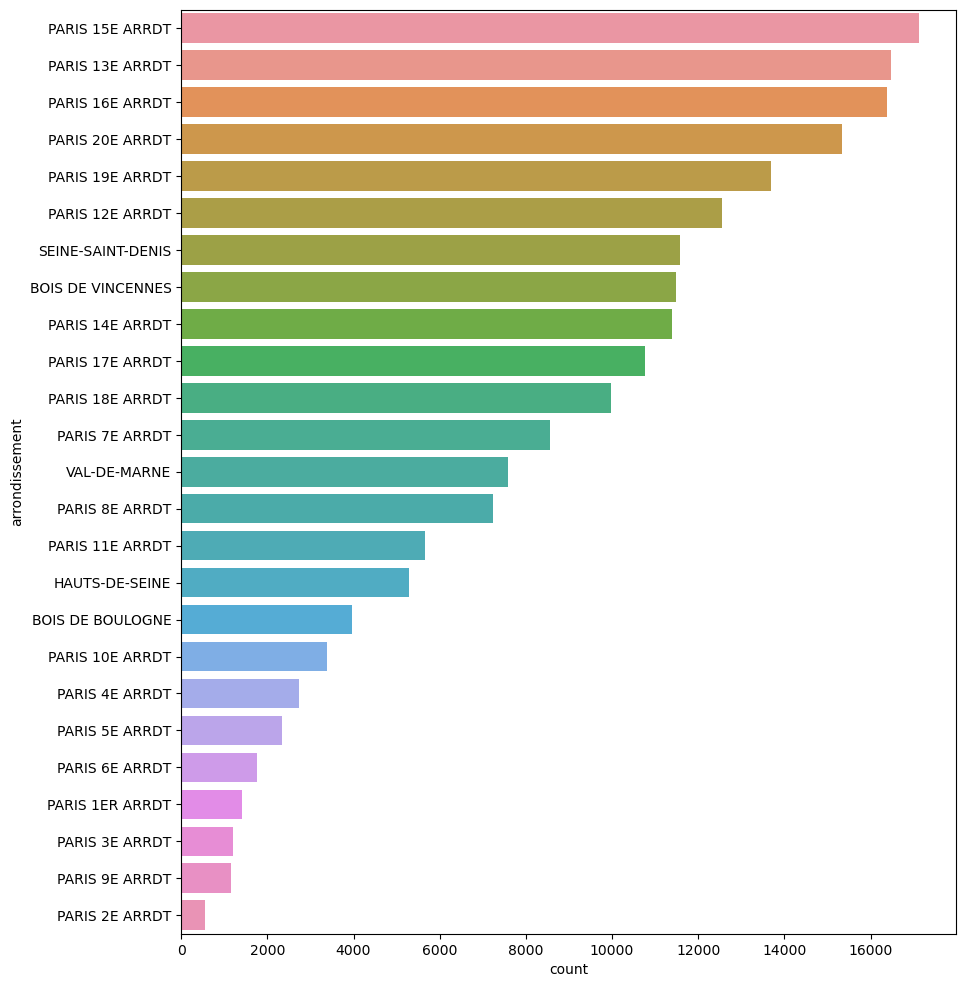

In [48]:
plt.figure(figsize=(10,12))
repart_arron = df['arrondissement'].value_counts().index
sns.countplot(y="arrondissement", order=repart_arron, data=df)

Disparité dans l’implantation des arbres. 

## Répartition des arbres selon le genre

<Axes: xlabel='count', ylabel='genre'>

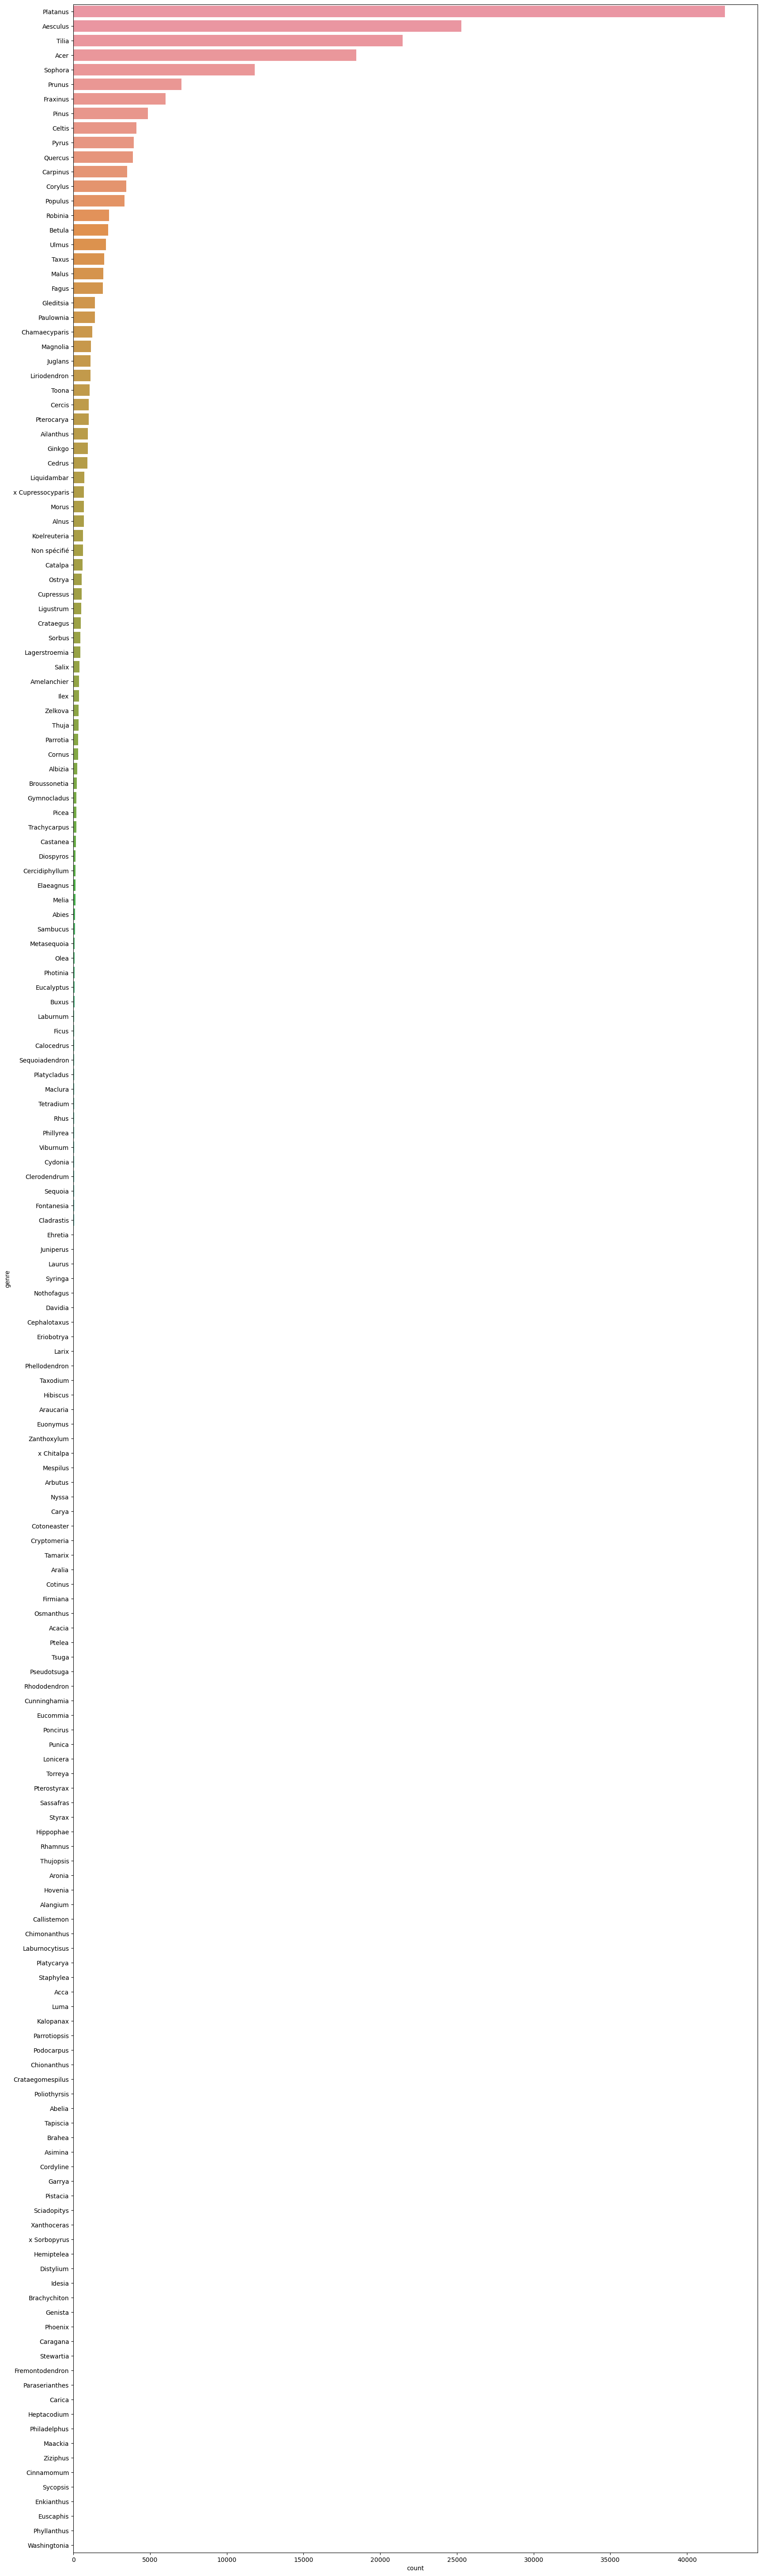

In [51]:
plt.figure(figsize=(20,75))
repart_gnr = df['genre'].value_counts().index
sns.countplot(y="genre", order=repart_gnr, data=df)

Disparité dans le genre des arbres. Culture de certaines espèces majoritaires

## Répartition domanialite

<Axes: xlabel='domanialite', ylabel='count'>

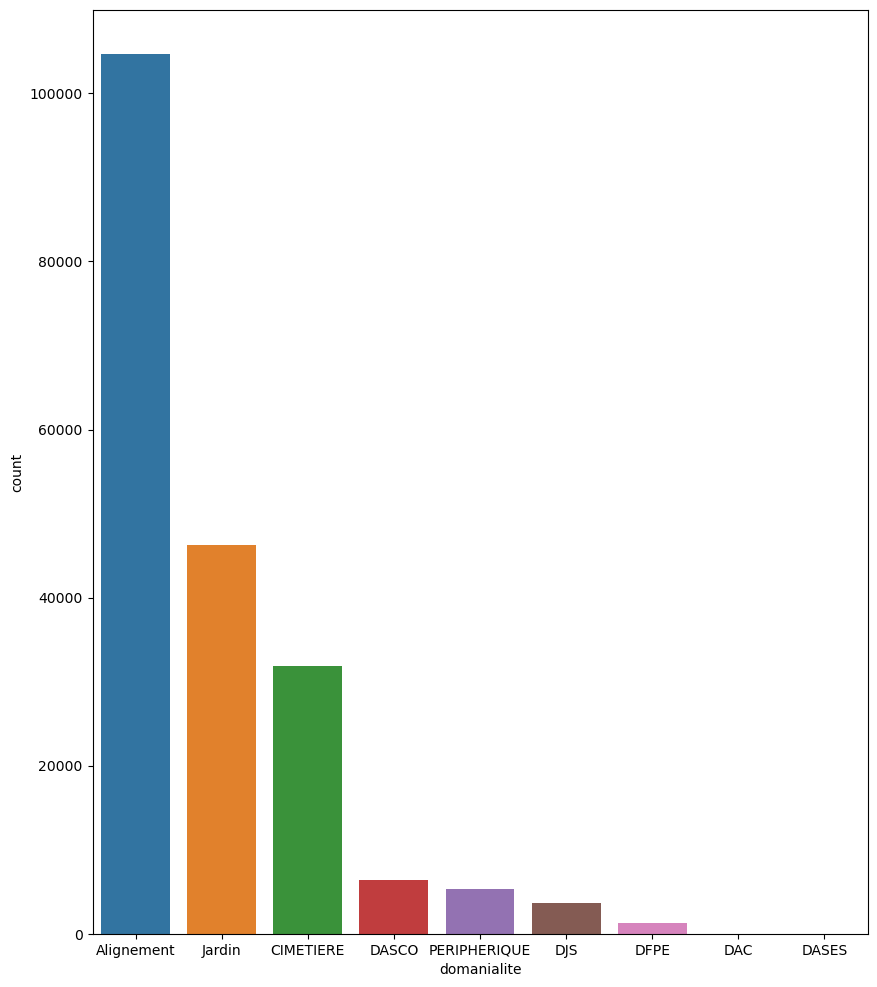

In [54]:
plt.figure(figsize=(10,12))
repart_domi = df['domanialite'].value_counts().index
sns.countplot(x="domanialite", order=repart_domi, data=df)

## Histogramme hauteur

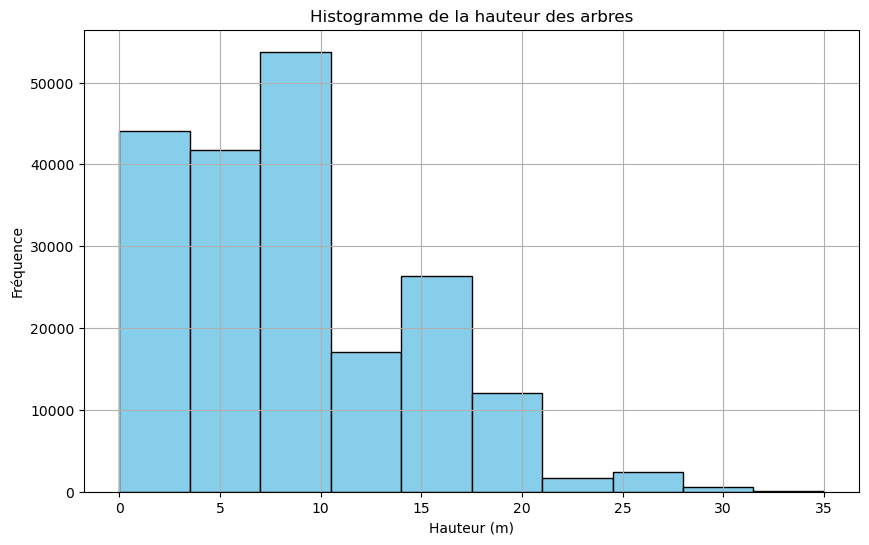

In [56]:
plt.figure(figsize=(10, 6))
plt.hist(df['hauteur_m'], color='skyblue', edgecolor='black')
plt.xlabel('Hauteur (m)')
plt.ylabel('Fréquence')
plt.title('Histogramme de la hauteur des arbres')
plt.grid(True)
plt.show()

## Histogramme Circonférences

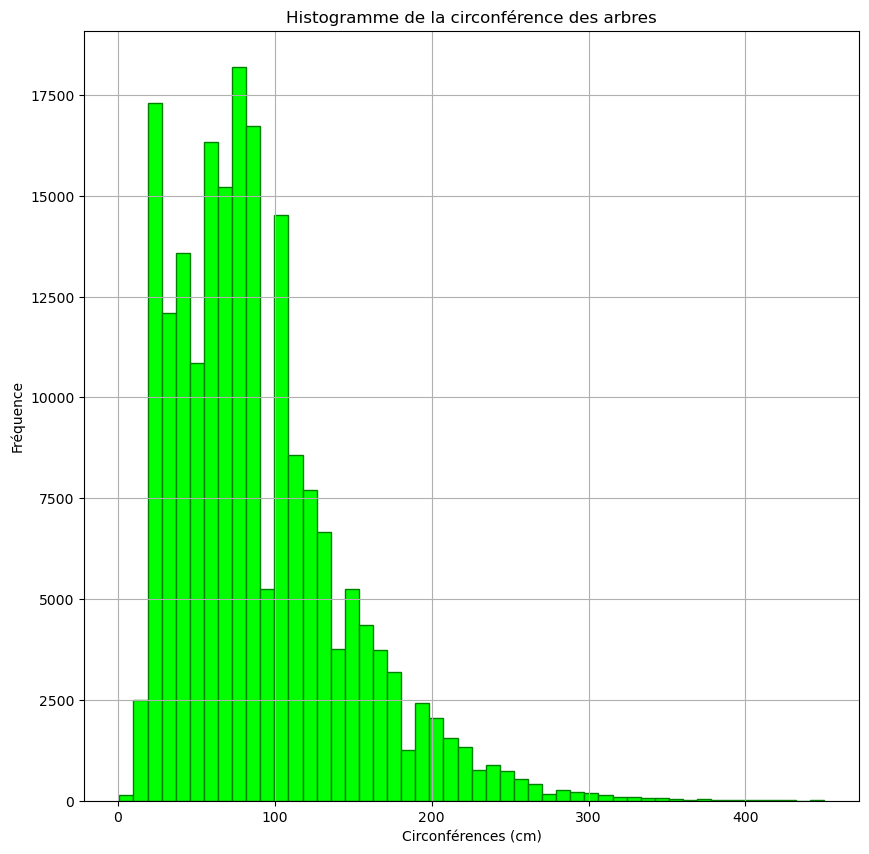

In [58]:
df = df[(df['circonference_cm'] > 0) & (df['circonference_cm'] <= 450)]
plt.figure(figsize=(10, 10))
plt.hist(df['circonference_cm'], bins= 50, color='lime', edgecolor='green')
plt.xlabel('Circonférences (cm)')
plt.ylabel('Fréquence')
plt.title('Histogramme de la circonférence des arbres')
plt.grid(True)
plt.show()

## relation Circonference et hauteur

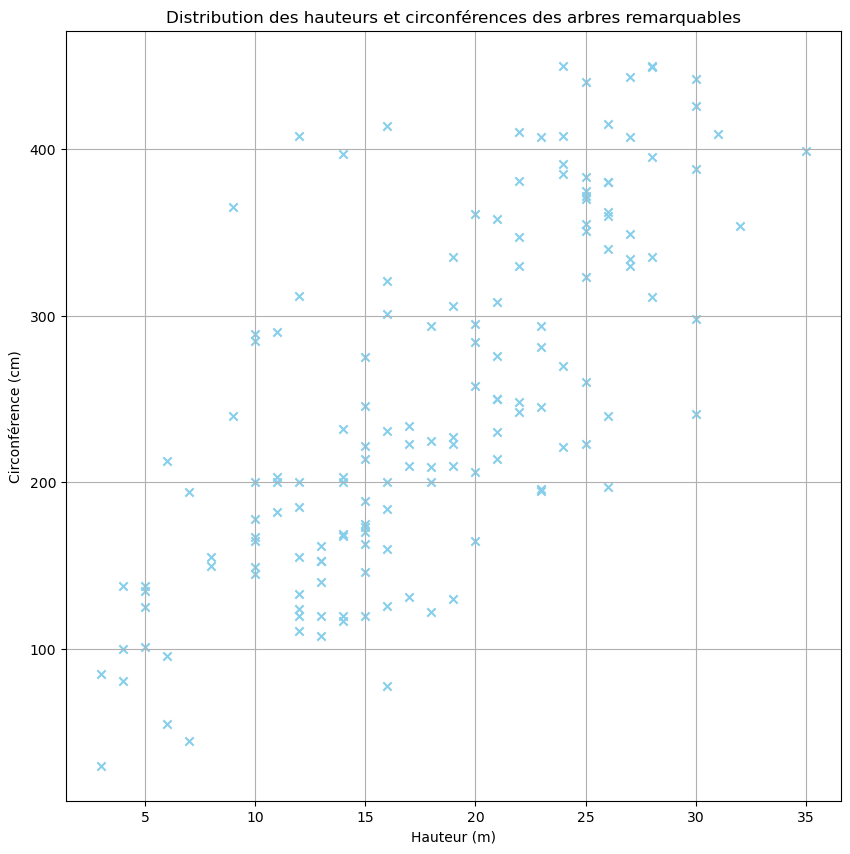

In [60]:
df_remarquable = df[df['remarquable'] == 1]
plt.figure(figsize=(10, 10))
plt.scatter(df_remarquable['hauteur_m'], df_remarquable['circonference_cm'], color='skyblue', marker='x')
plt.xlabel('Hauteur (m)')
plt.ylabel('Circonférence (cm)')
plt.title('Distribution des hauteurs et circonférences des arbres remarquables')
plt.grid(True)
plt.show()

## Boxplot Circo/Arrondissement

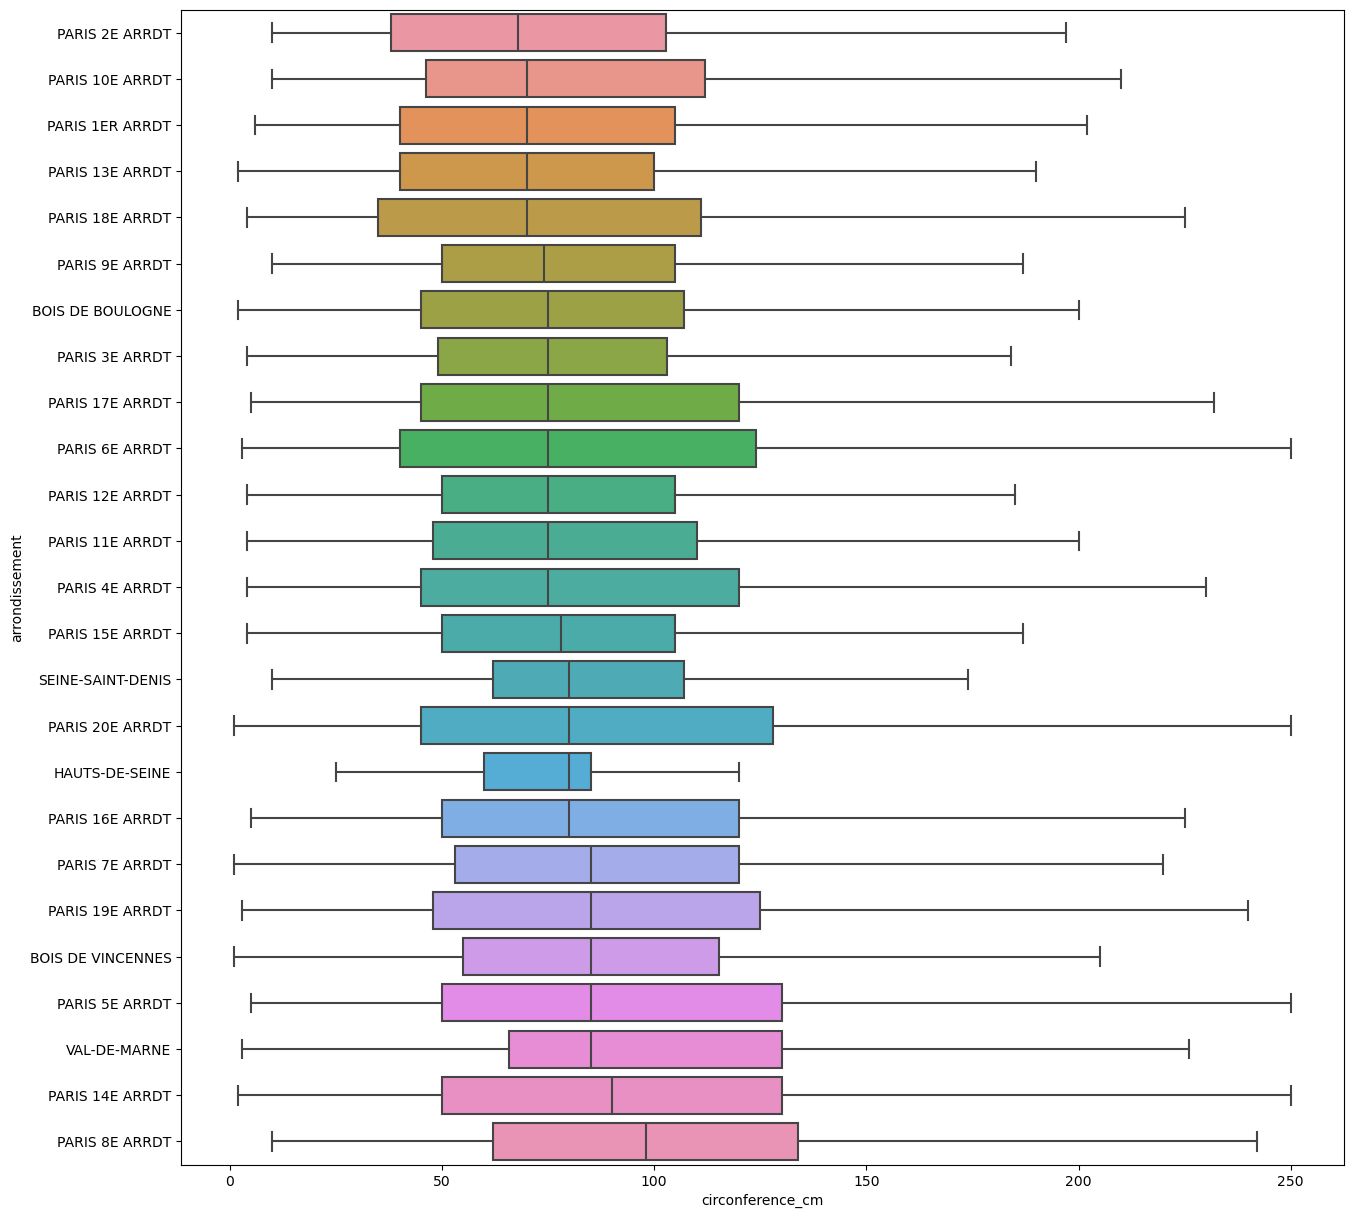

In [62]:
repart = df.groupby('arrondissement')['circonference_cm'].median().sort_values().index
plt.figure(figsize=(15,15)),
sns.boxplot(x="circonference_cm",y="arrondissement",showfliers=False,orient='h',order=repart,data=df);

In [63]:
Q1 = df['hauteur_m'].quantile(0.25)
Q3 = df['hauteur_m'].quantile(0.75)
IQR = Q3 - Q1
Qvar = IQR * 1,5
Qmi = Q1-Qvar
Qma = Q3+Qvar
print (Qma)
print (Qmi)
print (IQR)

[19. 17.]
[-2.  0.]
7.0


## Boxplot Hauteur/Arrondissement

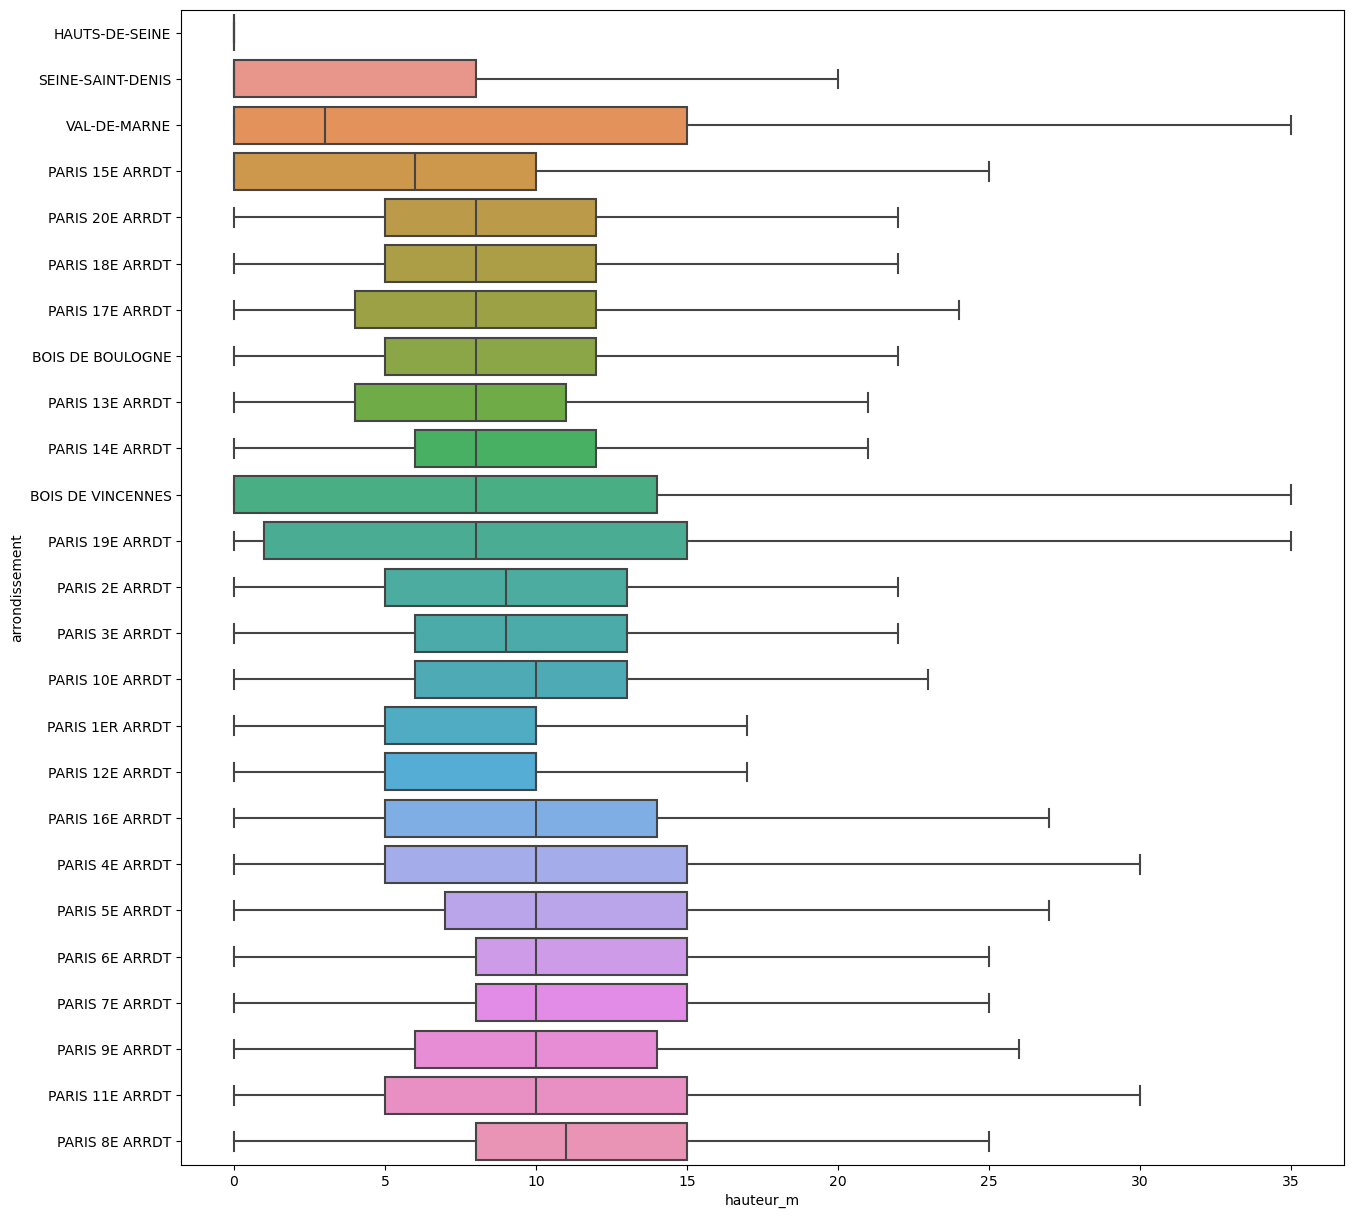

In [65]:
repartit = df.groupby('arrondissement')['hauteur_m'].median().sort_values().index
plt.figure(figsize=(15,15)),
sns.boxplot(x="hauteur_m",y="arrondissement",showfliers=False,orient='h',order=repartit,data=df);

## Grouped Boxplot Hauteur/Développement

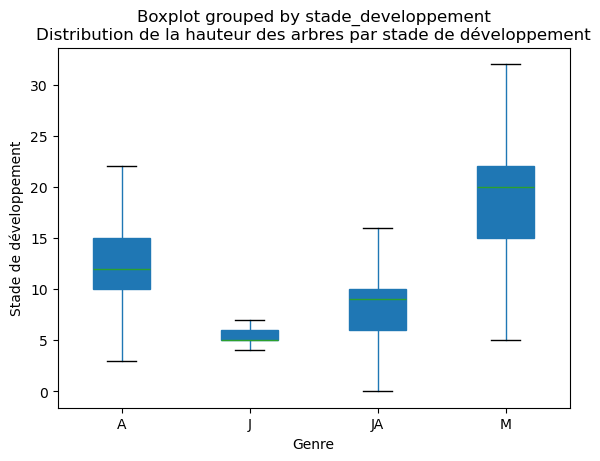

In [67]:
df.boxplot(column='hauteur_m', by='stade_developpement', grid=False, patch_artist=True, showfliers=False)
plt.title('Distribution de la hauteur des arbres par stade de développement')
plt.xlabel('Genre')
plt.ylabel('Stade de développement')
plt.show()

## Grouped Barplot hauteur et circonférence des arbres remarquables / arrondissement

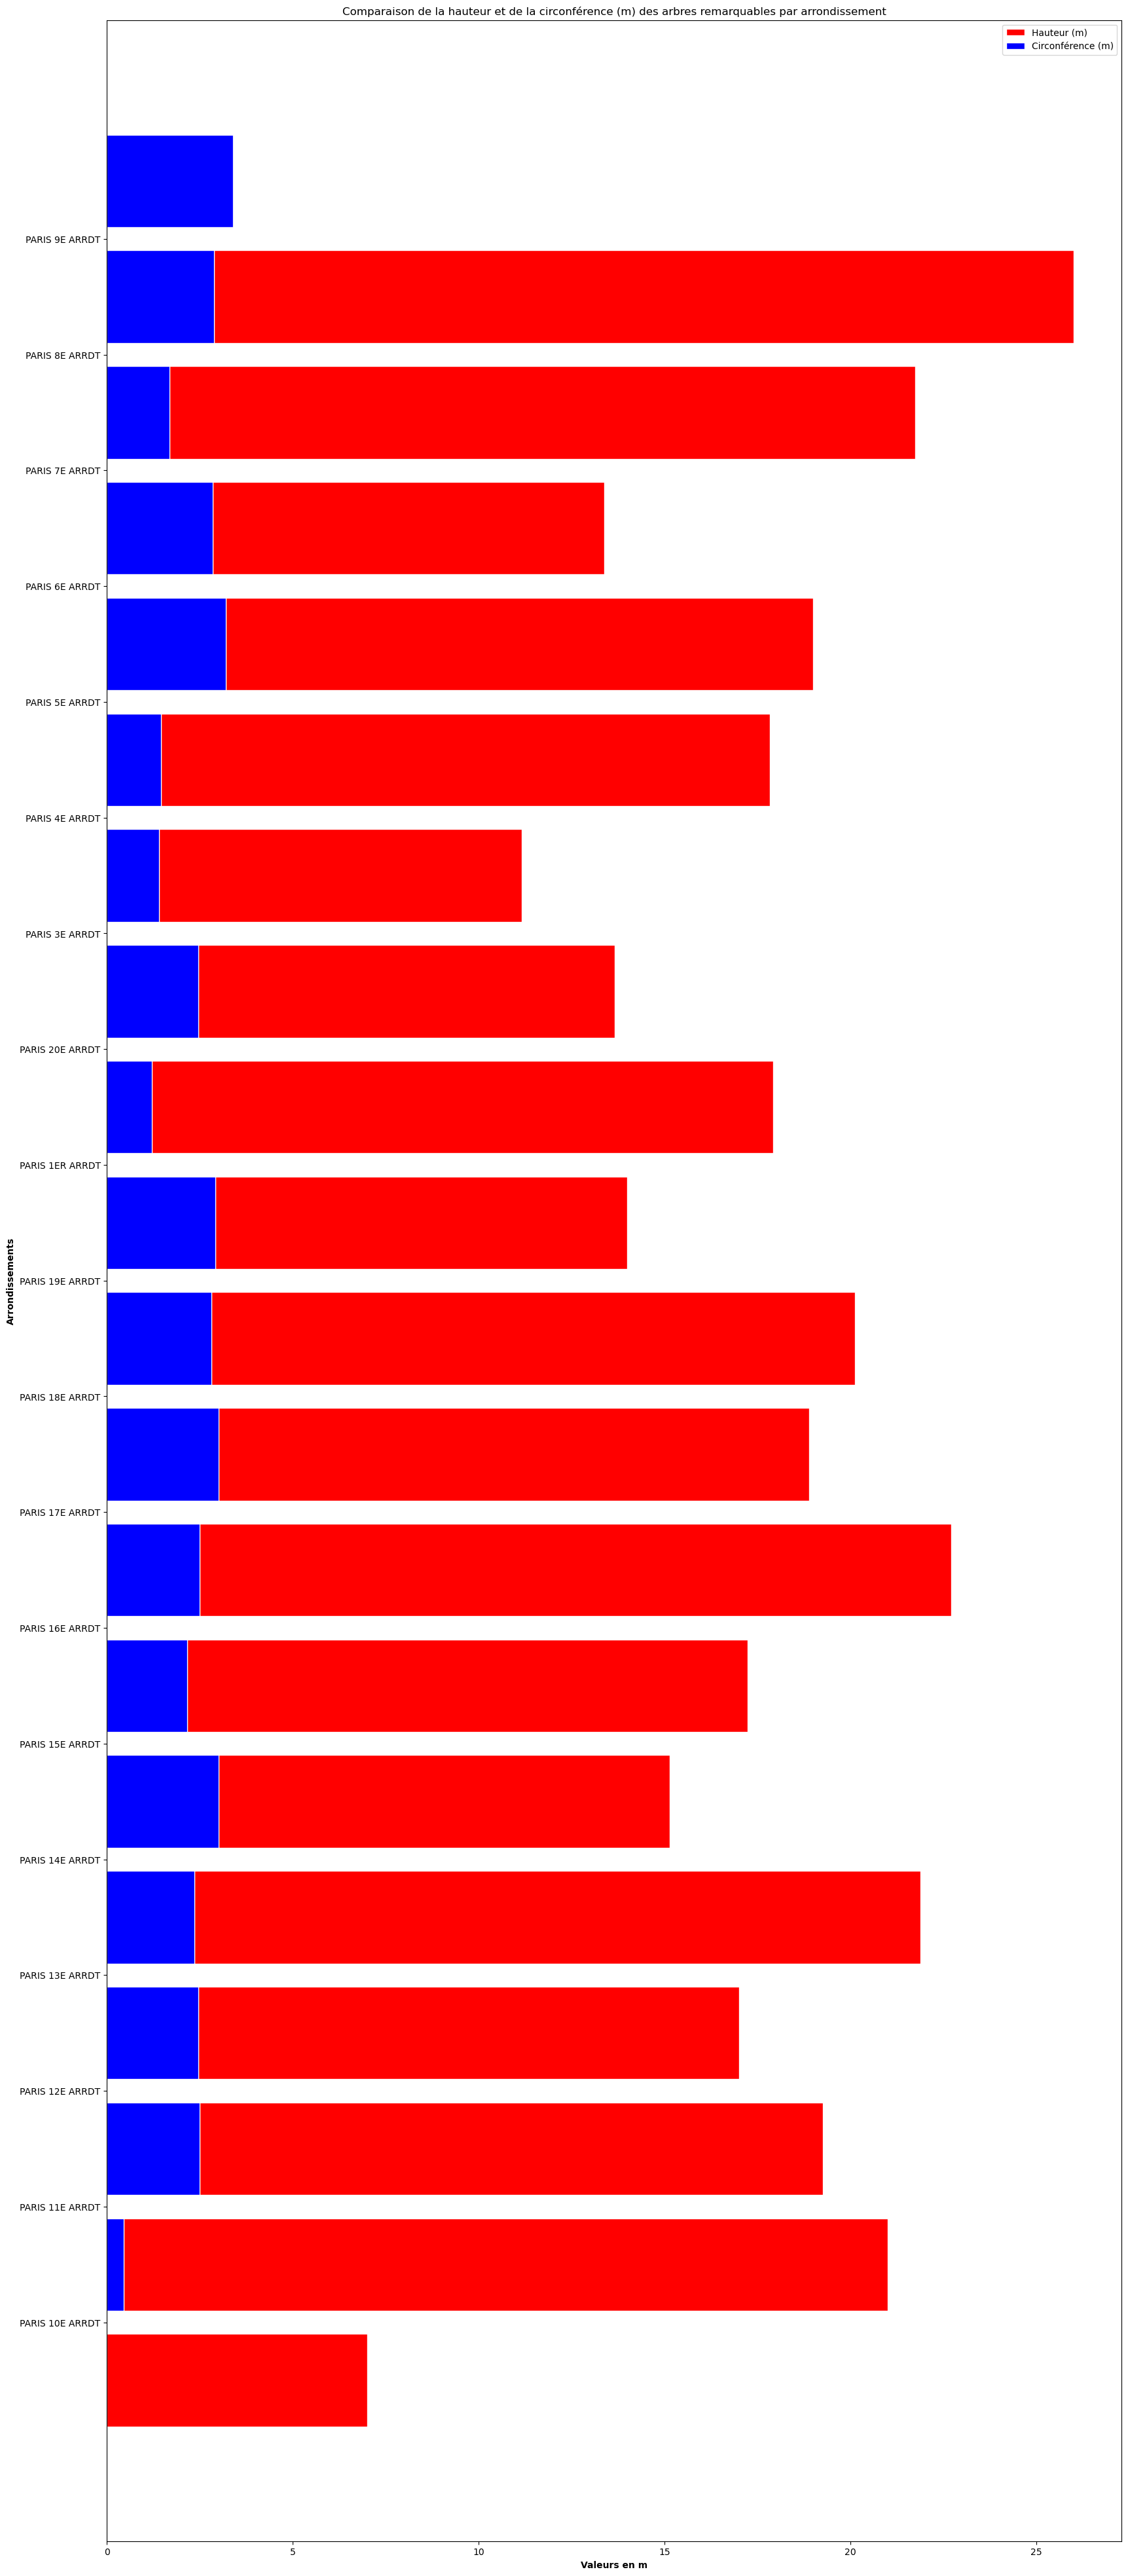

In [69]:
df_remarquable = df[df['remarquable'] == True]
grouped_data = df_remarquable.groupby('arrondissement').agg({'hauteur_m': 'mean', 'circonference_cm': 'mean'}).reset_index()

plt.figure(figsize=(20, 50))
barWidth = 1
r1 = range(len(grouped_data))
plt.barh(r1, grouped_data['hauteur_m'], color='red', edgecolor='white', label='Hauteur (m)')
plt.barh([x + barWidth for x in r1], grouped_data['circonference_cm'] / 100, color='blue', edgecolor='white', label='Circonférence (m)')
plt.ylabel('Arrondissements', fontweight='bold')
plt.yticks([r + barWidth / 2 for r in r1], grouped_data['arrondissement'])
plt.xlabel('Valeurs en m', fontweight='bold')
plt.title('Comparaison de la hauteur et de la circonférence (m) des arbres remarquables par arrondissement')
plt.legend()

## Grouped Barplot hauteur et circonférence des arbres remarquables / genre

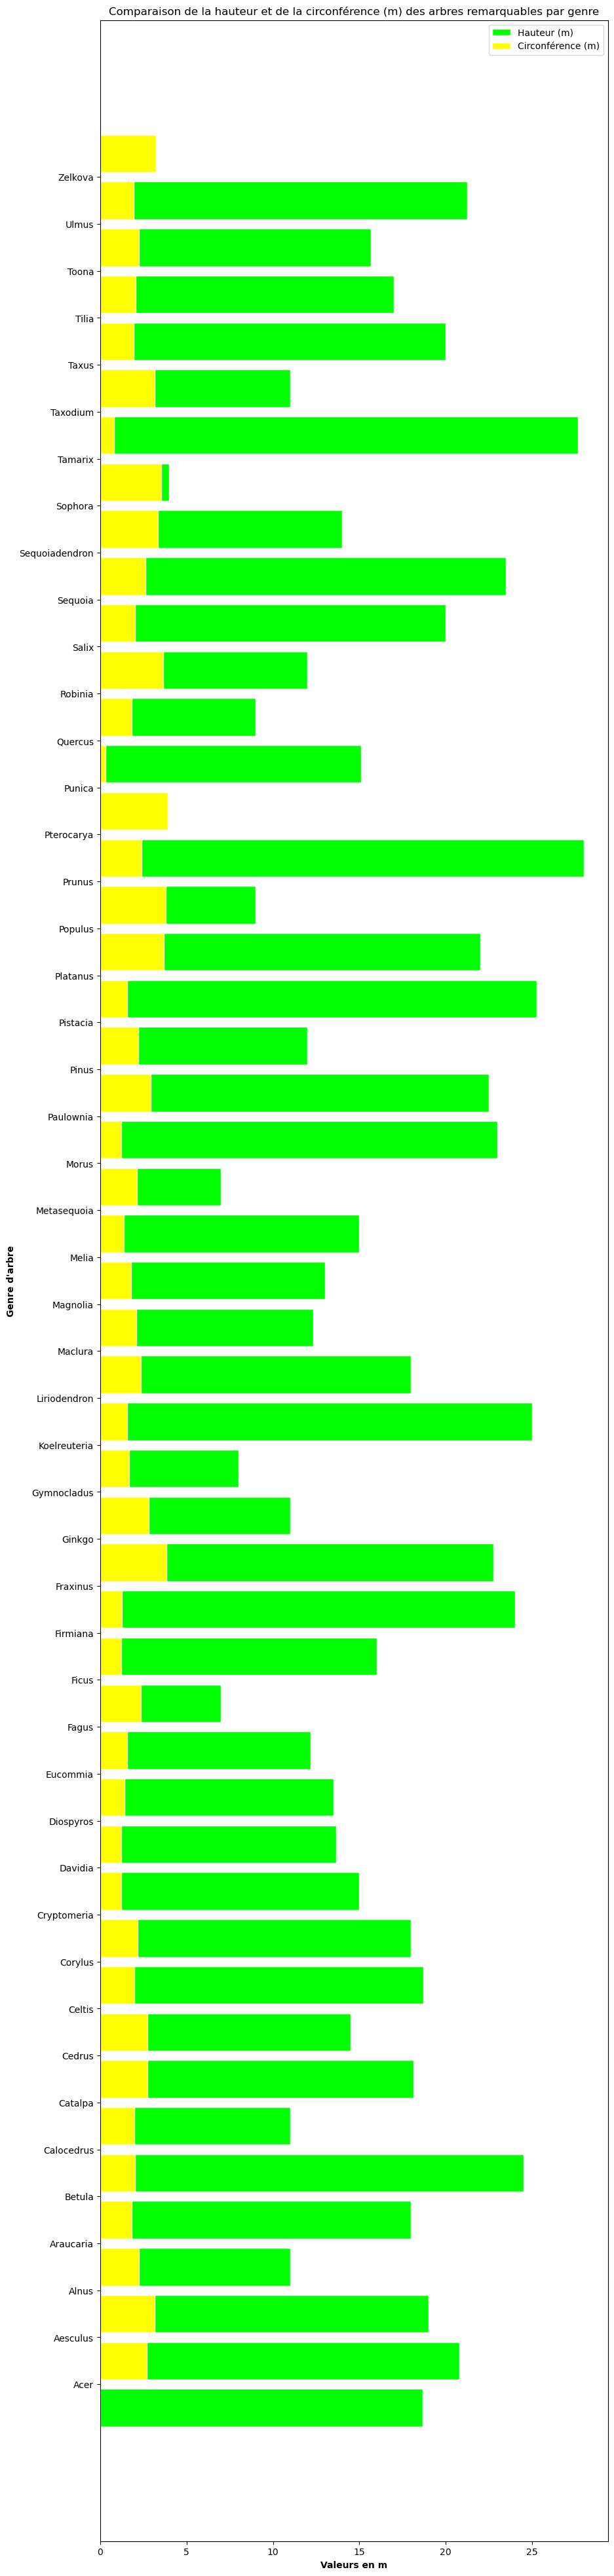

In [71]:
df_remarquable = df[df['remarquable'] == True]
grouped_data = df_remarquable.groupby('genre').agg({'hauteur_m': 'mean', 'circonference_cm': 'mean'}).reset_index()

plt.figure(figsize=(10, 50))
barWidth = 1
r1 = range(len(grouped_data))
plt.barh(r1, grouped_data['hauteur_m'], color='lime', edgecolor='white', label='Hauteur (m)')
plt.barh([x + barWidth for x in r1], grouped_data['circonference_cm'] / 100, color='yellow', edgecolor='white', label='Circonférence (m)')
plt.ylabel('Genre d\'arbre', fontweight='bold')
plt.yticks([r + barWidth / 2 for r in r1], grouped_data['genre'])
plt.xlabel('Valeurs en m', fontweight='bold')
plt.title('Comparaison de la hauteur et de la circonférence (m) des arbres remarquables par genre')
plt.legend()
plt.show()

# test

# Donnees geo

## Carte Arbres remarquables

In [75]:
df_remarquable = df[df['remarquable'] == 1]
center_lat = df_remarquable['geo_point_2d_a'].mean()
center_lon = df_remarquable['geo_point_2d_b'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=14,)

for index, row in df_remarquable.iterrows():
    nom = row['genre']
    hauteur = row['hauteur_m']
    circo = row['circonference_cm']
    lat = row['geo_point_2d_a']
    lon = row['geo_point_2d_b']
    popup_text = f"Nom: {nom}<br>Hauteur: {hauteur} m<br>Circonférence: {circo} cm"
    folium.Marker([lat, lon], popup=popup_text).add_to(m)
display(m)

In [116]:
# Charger le fichier GeoJSON des arrondissements de Paris
file_path_geojson = 'arrondissements.geojson'
gdf = gpd.read_file(file_path_geojson)

# Charger le fichier CSV des arbres
file_path_csv = 'p2-arbres-fr.csv'
df = pd.read_csv(file_path_csv, sep=';')

# Compteur pour les modifications
modifications = {
    'remplace_par_16': 0,
    'supprime_val_de_marne': 0,
    'supprime_seine_saint_denis': 0,
    'supprime_hauts_de_seine': 0,
    'remplace_par_12': 0
}

# Remplacer les valeurs spécifiques dans la colonne 'arrondissement'
df['arrondissement'] = df['arrondissement'].replace({
    'BOIS DE BOULOGNE': '16',
    'VAL-DE-MARNE': pd.NA,
    'SEINE-SAINT-DENIS': pd.NA,
    'HAUTS-DE-SEINE': pd.NA,
    'BOIS DE VINCENNES': '12',
    'PARIS 15E ARRDT': '15',
    'PARIS 13E ARRDT': '13',
    'PARIS 16E ARRDT': '16',
    'PARIS 20E ARRDT': '20',
    'PARIS 19E ARRDT': '19',
    'PARIS 12E ARRDT': '12',
    'PARIS 14E ARRDT': '14',
    'PARIS 17E ARRDT': '17',
    'PARIS 18E ARRDT': '18',
    'PARIS 7E ARRDT': '7',
    'PARIS 8E ARRDT': '8',
    'PARIS 11E ARRDT': '11',
    'PARIS 10E ARRDT': '10',
    'PARIS 4E ARRDT': '4',
    'PARIS 5E ARRDT': '5',
    'PARIS 6E ARRDT': '6',
    'PARIS 1ER ARRDT': '1',
    'PARIS 3E ARRDT': '3',
    'PARIS 9E ARRDT': '9',
    'PARIS 2E ARRDT': '2'
})

# Calculer le nombre total d'arbres par arrondissement après les modifications
total_arbres = df['arrondissement'].value_counts().reset_index()
total_arbres.columns = ['arrondissement', 'total_arbres']
print(total_arbres)

# Calculer le pourcentage d'arbres par arrondissement dans df
total_arbres['pourcentage'] = (total_arbres['total_arbres'] / total_arbres['total_arbres'].sum()) * 100

# Afficher le résultat
print(total_arbres[['arrondissement', 'pourcentage']])

# Fusionner les données de pourcentage avec le GeoDataFrame gdf
gdf['c_ar'] = gdf['c_ar'].astype(str)
gdf = gdf.merge(total_arbres, left_on='c_ar', right_on='arrondissement', how='left')

# Création de la carte avec Folium
m = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

# Définir la fonction de style pour la choroplèthe
def style_function(feature):
    if 'pourcentage' in feature['properties']:
        pourcentage = feature['properties']['pourcentage']
        if isinstance(pourcentage, (int, float)):
            if pourcentage < 1:
                color = 'lightgreen'
            elif pourcentage < 5:
                color = 'mediumseagreen'
            elif pourcentage < 10:
                color = 'seagreen'
            elif pourcentage < 30:
                color = 'green'
            else:
                color = 'darkgreen'
        else:
            color = 'gray'  # Couleur par défaut si pourcentage n'est pas un nombre valide
    else:
        color = 'gray'  # Couleur par défaut si 'pourcentage' n'est pas dans les propriétés

    return {
        'fillColor': color,
        'fillOpacity': 0.7,
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5'
    }

# Ajouter les polygones des arrondissements avec la répartition des arbres
folium.GeoJson(
    gdf,
    name='Répartition des arbres',
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=['c_ar', 'pourcentage'],
                                  aliases=['Arrondissement', 'Pourcentage (%)'],
                                  labels=True,
                                  sticky=True)
).add_to(m)

# Ajouter la légende
folium.LayerControl().add_to(m)

# Définir la fonction de style pour la choroplèthe
def style_function(feature):
    if 'pourcentage' in feature['properties']:
        pourcentage = feature['properties']['pourcentage']
        if isinstance(pourcentage, (int, float)):
            if pourcentage < 1:
                color = 'lightgreen'
            elif pourcentage < 4:
                color = 'mediumseagreen'
            elif pourcentage < 7:
                color = 'seagreen'
            elif pourcentage < 10:
                color = 'green'
            else:
                color = 'darkgreen'
        else:
            color = 'gray'  # Couleur par défaut si pourcentage n'est pas un nombre valide
    else:
        color = 'gray'  # Couleur par défaut si 'pourcentage' n'est pas dans les propriétés

    return {
        'fillColor': color,
        'fillOpacity': 0.7,
        'color': 'white',
        'weight': 1,
        'dashArray': '5, 5'
    }

# Ajouter les polygones des arrondissements avec la répartition des arbres
folium.GeoJson(
    gdf,
    name='Répartition des arbres',
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=['c_ar', 'pourcentage'],
                                  aliases=['Arrondissement', 'Pourcentage (%)'],
                                  labels=True,
                                  sticky=True)
).add_to(m)

# Ajouter la légende
folium.LayerControl().add_to(m)

# Afficher la carte dans Jupyter Notebook en utilisant display(m)
display(m)

   arrondissement  total_arbres
0              12         24110
1              16         20381
2              15         17151
3              13         16712
4              20         15340
5              19         13709
6              14         11399
7              17         10762
8              18         10011
9               7          8617
10              8          7245
11             11          5658
12             10          3385
13              4          2740
14              5          2368
15              6          1764
16              1          1413
17              3          1209
18              9          1167
19              2           548
   arrondissement  pourcentage
0              12    13.723113
1              16    11.600612
2              15     9.762137
3              13     9.512263
4              20     8.731338
5              19     7.802993
6              14     6.488169
7              17     6.125597
8              18     5.698137
9               7 